In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

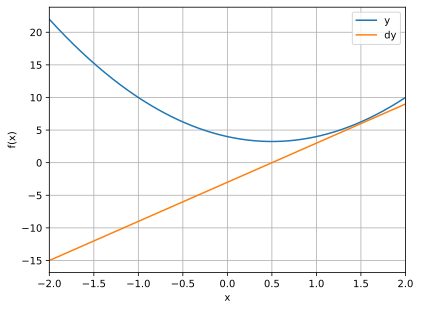

In [10]:
# plot the func and its derivative
x = np.linspace(-2,2,2001)

plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

# Performing Manual Gradient Descent in 1D

First guess: [0.084]
[0.49914517]


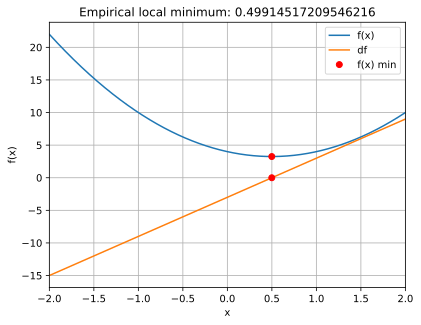

In [11]:
# random starting point
localmin = np.random.choice(x,1)
print('First guess: ' + str(localmin))

# learning params
learning_rate = 0.01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

print(localmin)

# plot the results
plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin, deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: ' + str(localmin[0]))
plt.show()

# Store the model params and outputs on each iteration

/var/folders/hq/g4lbt92n6_z1bm1n0gxmyx7c0000gn/T/ipykernel_57534/2316820178.py:13: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


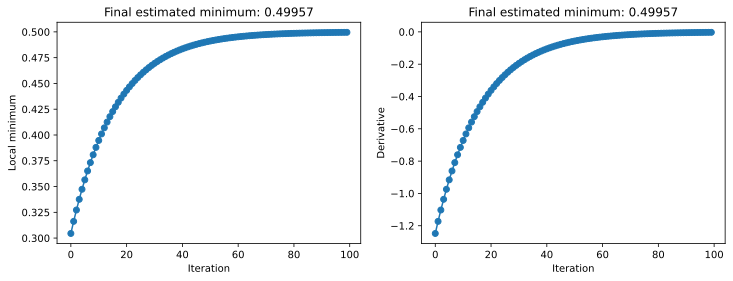

In [12]:
# random starting point
localmin = np.random.choice(x,1)

# learning params
learning_rate = 0.01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin,grad

# plot the gradient over iterations
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i],'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# How do model params (learning rate, training epochs) affect the model's accuracy?

Remember, our expected minimum of this function is $0.5$. We started with a learning rate of $0.01$ and our model was very good. Try adjusing the learning rate to $1$ and notice the absurd values this generates. Try $0.001$. Notice that the model does not reach a good approximation over 100 epochs (due to a slower learning rate), but it does move in the right direction. Try compensating for this by upping the training epochs to $1000$.

/var/folders/hq/g4lbt92n6_z1bm1n0gxmyx7c0000gn/T/ipykernel_57534/3139266121.py:13: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


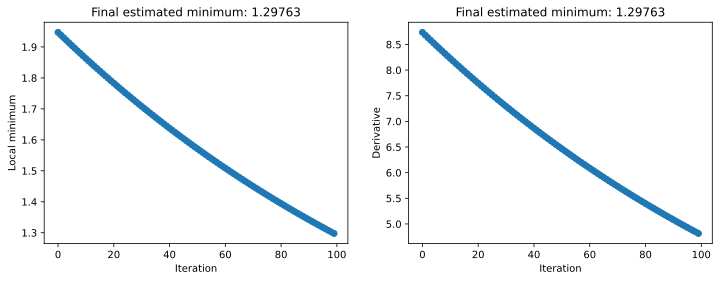

In [13]:
# random starting point
localmin = np.random.choice(x,1)

# learning params
learning_rate = 0.001
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin,grad

# plot the gradient over iterations
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i],'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Summary
These model parameters work well for this specific function. In the real world, the optimal parameters depend on the flavor of the gradient descent algorithm being employed, how deep the model is (ND), flavor of backprop, etc. . This can be a trial and error process, and they sometimes call this _tuning_ a model. 

A slower learning rate means you'll likely need a higher value of training epochs for the model to reach a sufficiently accurate approximation.

# Code Challenge
Most often in DL, the model trains for a set number of iterations, which is what we call training epochs. But there are other ways of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than some threshold, e.g., $0.1$. Make sure your code is robust for negative derivatives

1. Doese this change to the code produce a more accurate result? What if you change the stopping thresholds?
> This code doesn't seem to produce more accurate results than stoppage via N training epochs. Intuitively, my guess is that since we're arbitrarily stopping when the derivative is below a certain threshold, we are stopping at a local minimum more frequently than we were just solely using N iterations. Changing the stopping threshold does not solve this problem since the derivative at a local minima and the derivative at a global minima are the exact same.
2. Can you think of any potential problems that might arise when the stopping criterion is based on the derivative instead of a specified number of training epochs?
> Yes, see above lol.

It feels important to notice though that we are still reaching a relatively close approximation whilst also actively reducing the training time by stopping after sub-N epochs.

In [14]:
# random starting point
localmin = np.random.choice(x,1)
print(f'Initial estimate: {localmin[0]}')

# learning params
learning_rate = 0.01
training_epochs = 1000
threshold = 0.1

# run through training and store all the results
modelparams = np.zeros((training_epochs, 2))

epoch = 0
for i in range(training_epochs):
    epoch = i
    grad = deriv(localmin)
    localmin -= learning_rate*grad
    modelparams[i,:] = float(localmin), float(grad[0])
    if abs(grad) < threshold:
        break

print(f'Final estimated minimum: {localmin[0]:.5f} in {epoch} epochs.')

Initial estimate: 1.6840000000000002
Final estimated minimum: 0.51557 in 69 epochs.
